Import Libraries

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import joblib
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier

# Evaluate Model Performance
from sklearn.model_selection import cross_val_score ,KFold,StratifiedKFold

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Resampling Techniques
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.combine import SMOTETomek ,SMOTEENN

# Dimensionality Reduction Technique
from sklearn.decomposition import PCA

# Performance Metrics
from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay , roc_auc_score
from sklearn.metrics import roc_curve , classification_report

DATA EXPLORATION

Load data


In [75]:
df = pd.read_csv(r'C:\Users\Msi\OneDrive\Documents\NTI\AI-AU25\project 2(supervised)\Data\data.csv')


In [76]:
df.shape

(569, 33)

In [77]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [78]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [80]:
df.dtypes  

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [81]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [82]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

Check Null values


In [83]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Check dublicated

In [84]:
df.duplicated().sum()

np.int64(0)

Data Visualization

C:\Users\Msi\AppData\Local\Temp\ipykernel_17436\3482504004.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='Set2')


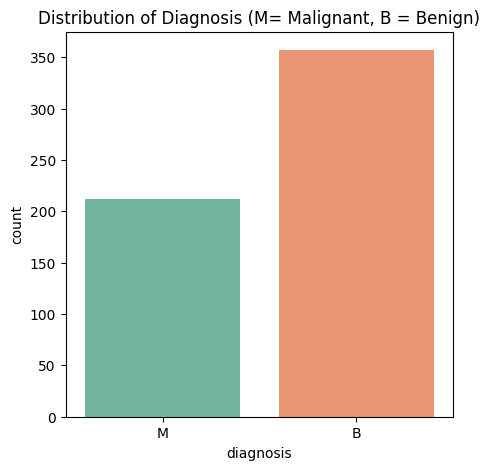

In [85]:
plt.figure(figsize=(5,5))
sns.countplot(x='diagnosis', data=df, palette='Set2')
plt.title("Distribution of Diagnosis (M= Malignant, B = Benign)")
plt.show()

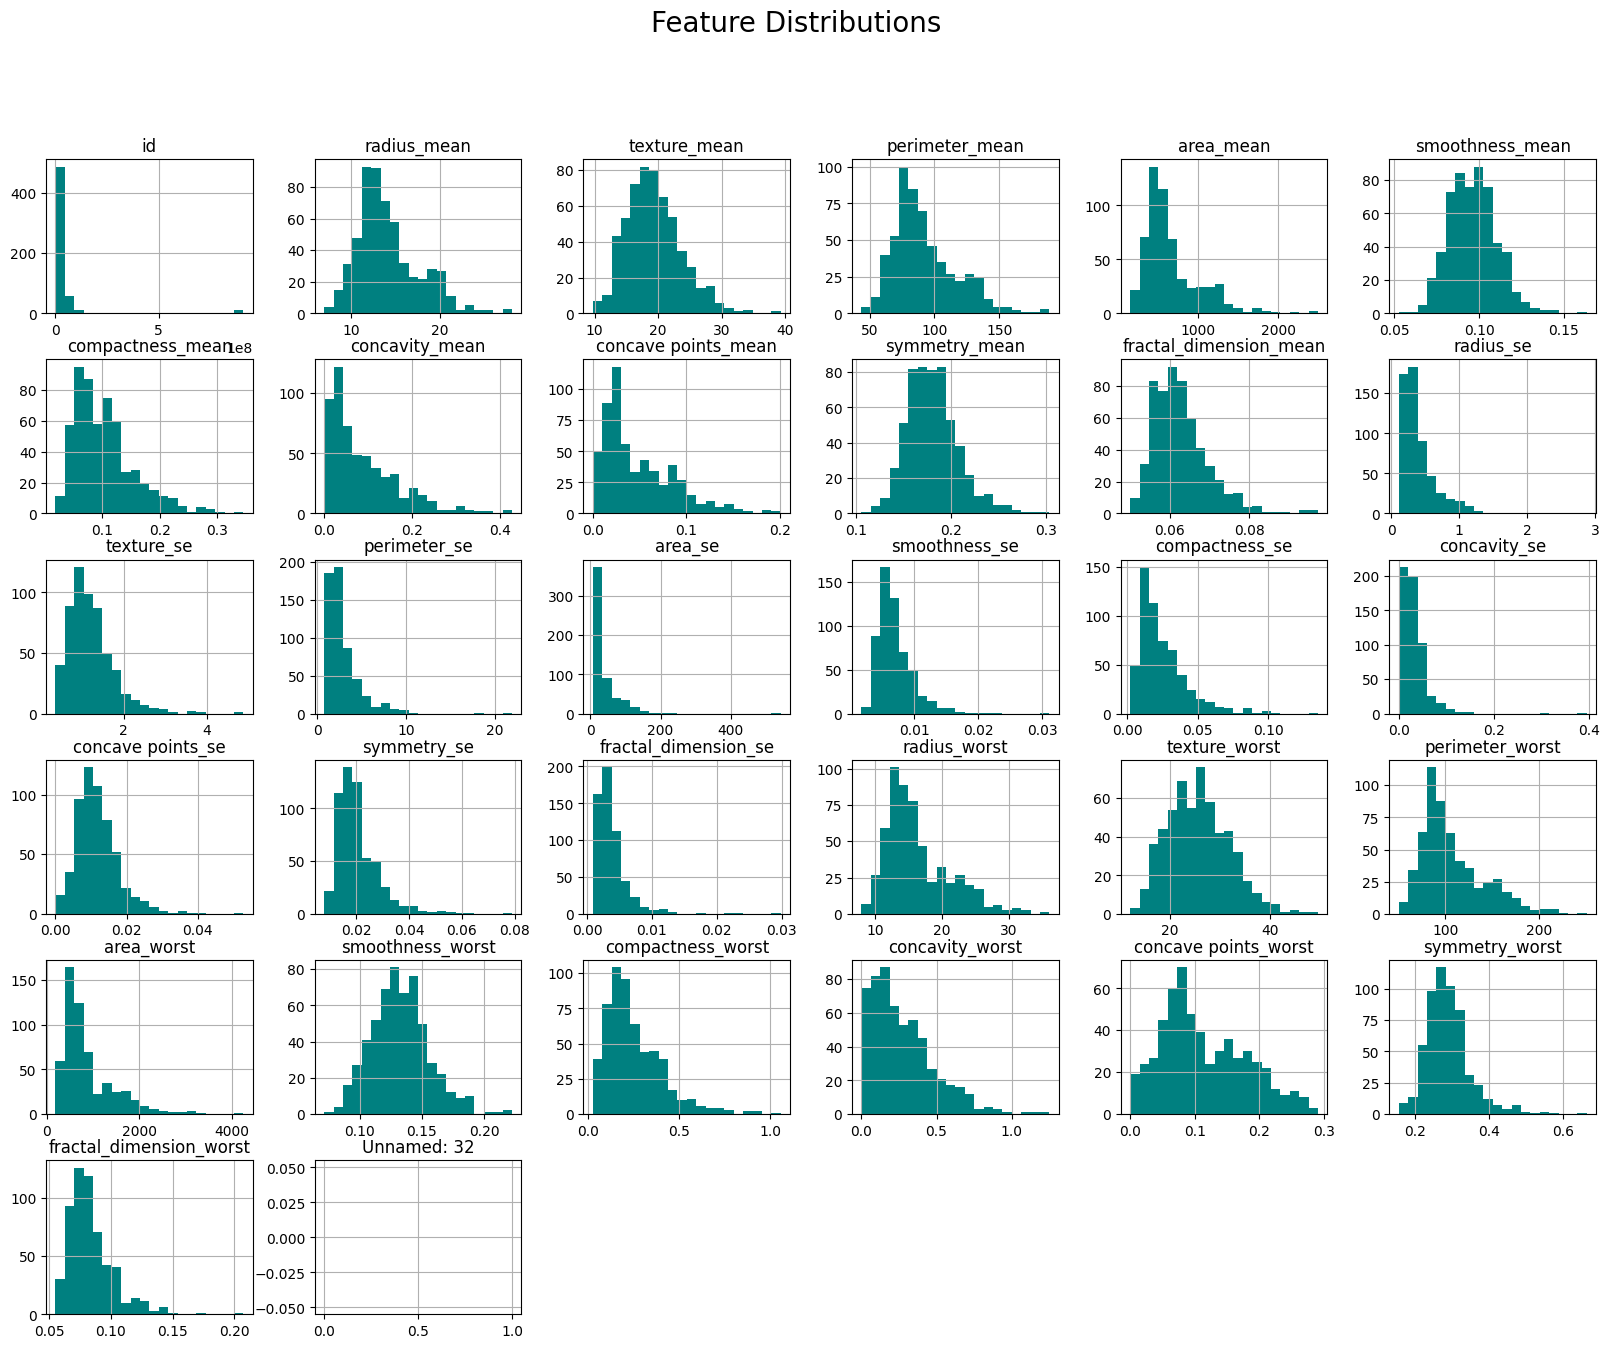

In [86]:
df.hist(bins=20, figsize=(20,15), color='teal')
plt.suptitle("Feature Distributions", fontsize=20)
plt.show()

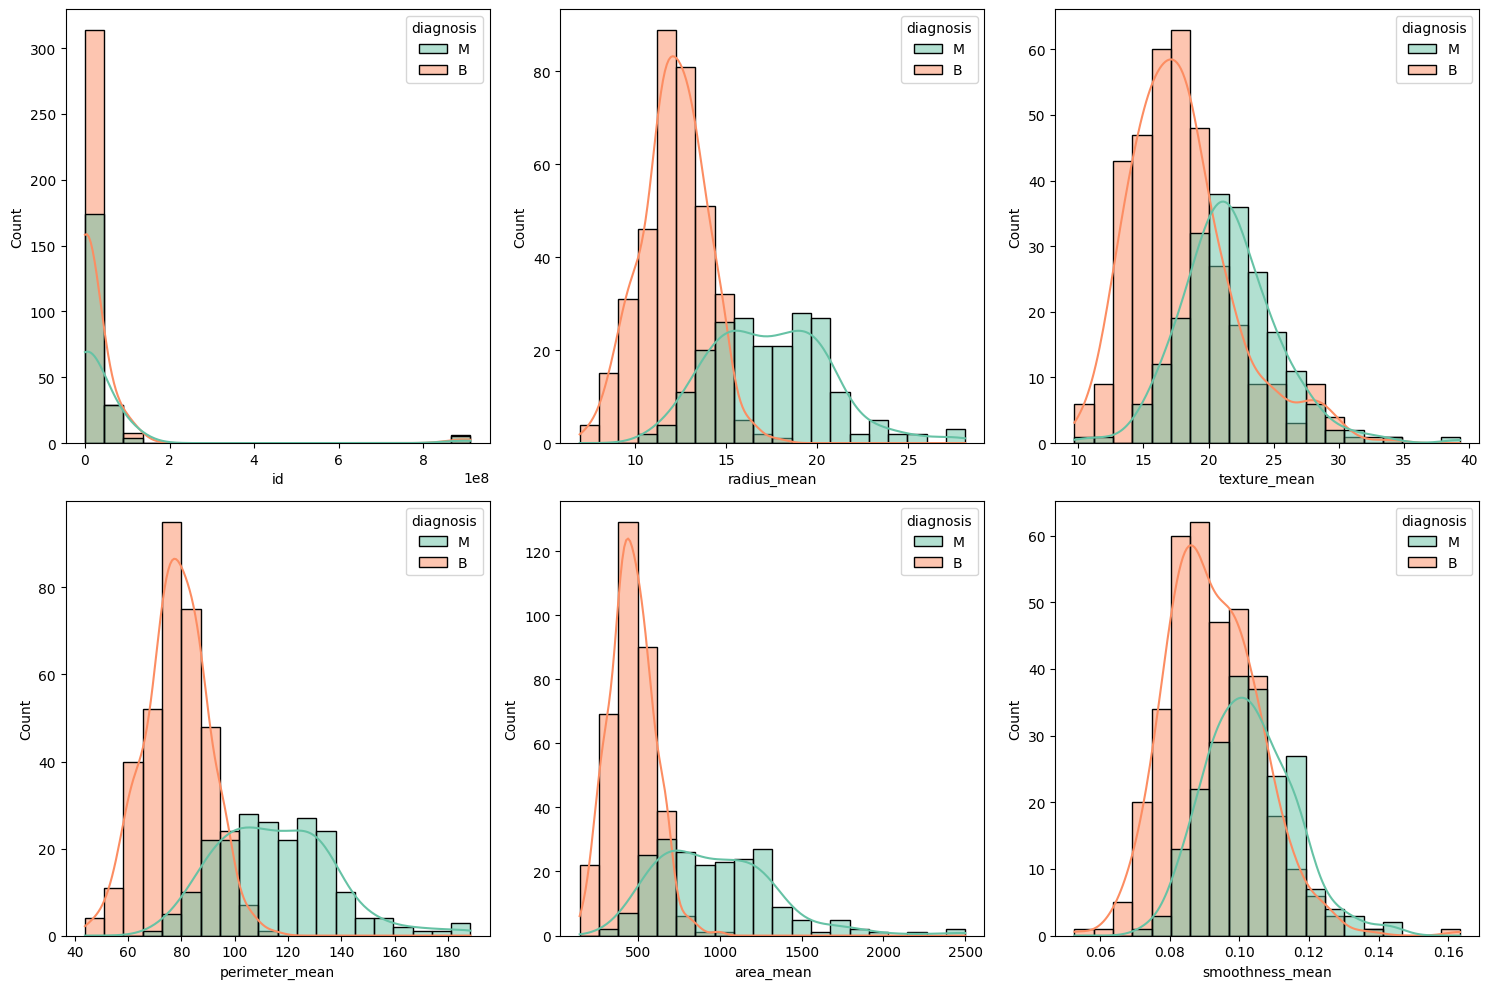

In [87]:
plt.figure(figsize=(15,10))
for i, col in enumerate(df.drop('diagnosis', axis=1).columns[:6]):
    plt.subplot(2, 3, i+1)
    sns.histplot(data=df, x=col, hue='diagnosis', bins=20, kde=True, palette='Set2')
plt.tight_layout()
plt.show()

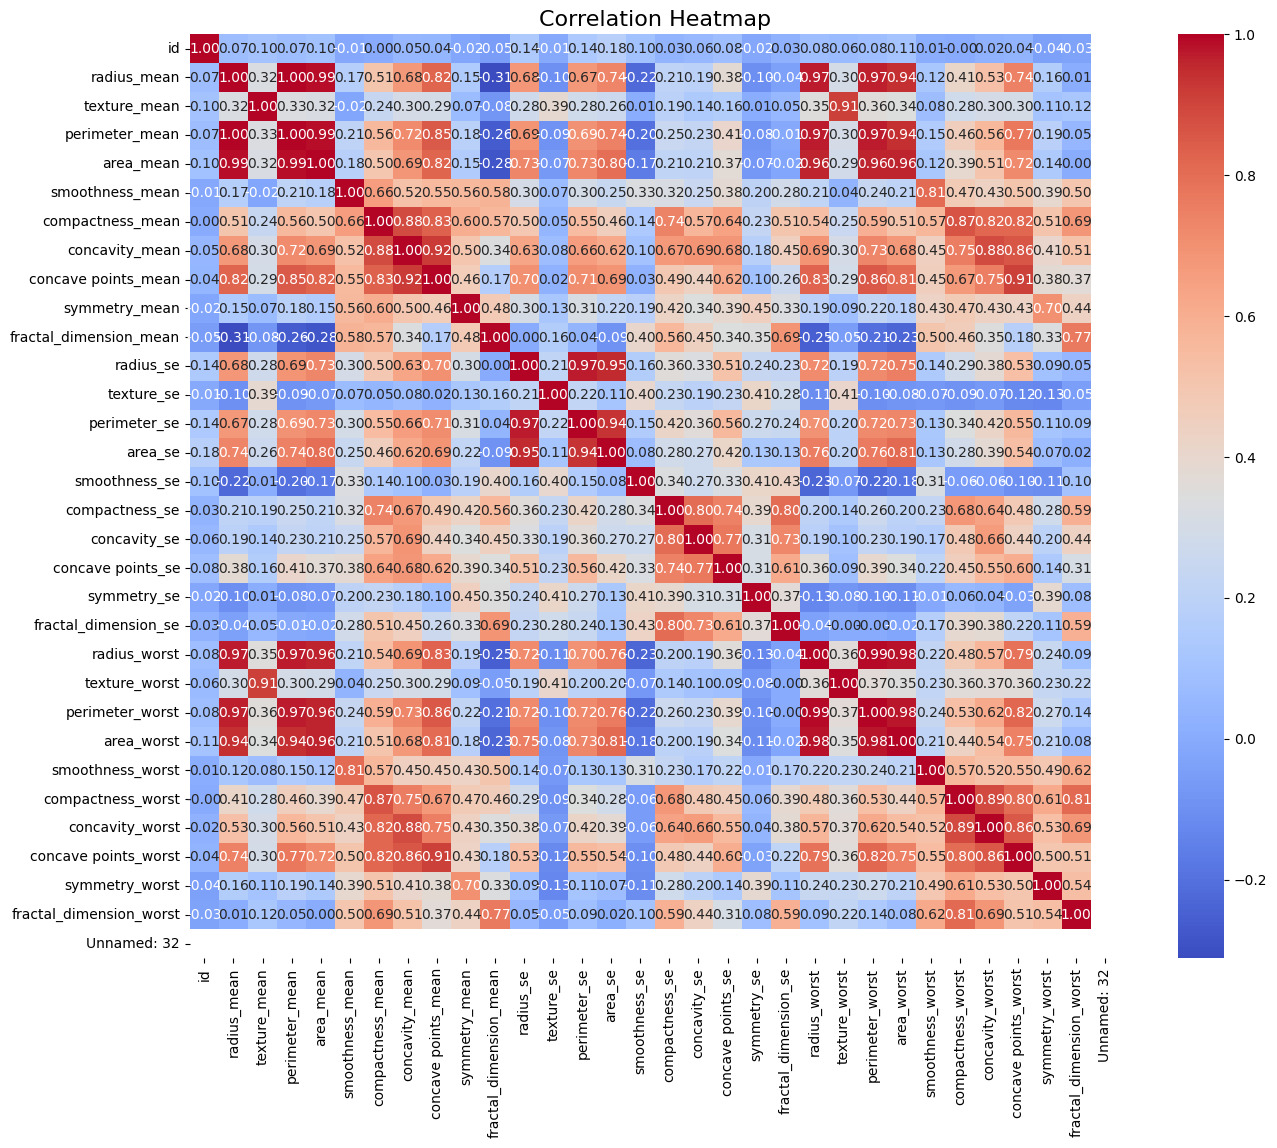

In [88]:
plt.figure(figsize=(15,12))
correlation = df.select_dtypes(include=['number']).corr()
sns.heatmap(
    correlation,
    annot=True,         
    fmt=".2f",         
    cmap='coolwarm',    
    cbar=True         
)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

Data Preprocessing

In [89]:
# Convert diagnosis to target
df['target'] = df['diagnosis'].map({'M':0, 'B':1})

In [90]:
# Drop useless columns
df = df.drop(['id', 'Unnamed: 32', 'diagnosis'], axis=1)

Check outliers

In [91]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [92]:
# Function to count outliers in each column
def count_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return ((data[col] < lower_limit) | (data[col] > upper_limit)).sum()

# Print number of outliers before handling
print("Outliers count BEFORE handling:")
for col in numeric_cols:
    print(f"{col}: {count_outliers(df, col)}")


Outliers count BEFORE handling:
radius_mean: 14
texture_mean: 7
perimeter_mean: 13
area_mean: 25
smoothness_mean: 6
compactness_mean: 16
concavity_mean: 18
concave points_mean: 10
symmetry_mean: 15
fractal_dimension_mean: 15
radius_se: 38
texture_se: 20
perimeter_se: 38
area_se: 65
smoothness_se: 30
compactness_se: 28
concavity_se: 22
concave points_se: 19
symmetry_se: 27
fractal_dimension_se: 28
radius_worst: 17
texture_worst: 5
perimeter_worst: 15
area_worst: 35
smoothness_worst: 7
compactness_worst: 16
concavity_worst: 12
concave points_worst: 0
symmetry_worst: 23
fractal_dimension_worst: 24
target: 0


In [93]:
# Ensure numeric_cols only contains columns that still exist in df
numeric_cols = [col for col in numeric_cols if col in df.columns]

# Handle outliers with capping (Winsorization)
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper_limit, upper_limit,
              np.where(df[col] < lower_limit, lower_limit, df[col]))


In [94]:
# Print number of outliers after handling
print("\nOutliers count AFTER handling:")
for col in numeric_cols:
    print(f"{col}: {count_outliers(df, col)}")


Outliers count AFTER handling:
radius_mean: 0
texture_mean: 0
perimeter_mean: 0
area_mean: 0
smoothness_mean: 0
compactness_mean: 0
concavity_mean: 0
concave points_mean: 0
symmetry_mean: 0
fractal_dimension_mean: 0
radius_se: 0
texture_se: 0
perimeter_se: 0
area_se: 0
smoothness_se: 0
compactness_se: 0
concavity_se: 0
concave points_se: 0
symmetry_se: 0
fractal_dimension_se: 0
radius_worst: 0
texture_worst: 0
perimeter_worst: 0
area_worst: 0
smoothness_worst: 0
compactness_worst: 0
concavity_worst: 0
concave points_worst: 0
symmetry_worst: 0
fractal_dimension_worst: 0
target: 0


In [95]:
print(df.shape)

(569, 31)


In [96]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.to_list()
num_cols

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'target']

In [97]:
cat_cols = df.select_dtypes(include='object').columns.to_list()
cat_cols

[]

Split Data into Train/Test

In [98]:
# Split data into features (X) and target (y)
X = df.drop('target', axis=1)  # Features
y = df['target']               # Target

In [99]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((455, 30), (455,), (114, 30), (114,))

Resample Data before scaling

In [100]:
# Apply SMOTE for resampling (only on training set)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [101]:
# Apply Scaling (fit on training set, transform both train & test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

In [102]:
# Apply PCA (fit on scaled training data, transform both)
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [103]:
print("Original training shape:", X_train.shape)
print("After SMOTE:", X_train_res.shape)
print("After PCA:", X_train_pca.shape)

Original training shape: (455, 30)
After SMOTE: (570, 30)
After PCA: (570, 9)


Modeling


In [104]:
# Logistic Regression
log_reg = LogisticRegression()

# Cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(
    log_reg,
    X_train_pca,  
    y_train_res,  
    cv=kf,
    scoring='recall'
)
print("Average CV Recall Score:", np.mean(cv_scores))

# Fit model
log_reg.fit(X_train_pca, y_train_res)

# Predict on test data after PCA + scaling
y_pred_test = log_reg.predict(X_test_pca)

# Evaluation
print("\nRecall Score:", recall_score(y_test, y_pred_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))


Average CV Recall Score: 0.972257558118469

Recall Score: 0.9444444444444444

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94        42
         1.0       0.99      0.94      0.96        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [105]:
# KNN
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [49, 55, 59, 65],
    'p': [2, 1]  # 2: Euclidean, 1: Manhattan
}

knn_grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1
)

# Fit with training data after PCA + SMOTE + scaling
knn_grid_search.fit(X_train_pca, y_train_res)

# Results
print("\nBest KNN Params:", knn_grid_search.best_params_)
print("Best Recall (CV):", knn_grid_search.best_score_)

# Predict on test data after PCA + scaling
y_pred_knn = knn_grid_search.predict(X_test_pca)

# Evaluation
print("Recall (Test):", recall_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))



Best KNN Params: {'n_neighbors': 49, 'p': 2}
Best Recall (CV): 0.968421052631579
Recall (Test): 0.9444444444444444
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90        42
         1.0       0.94      0.94      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



In [106]:
# SVM
svm_clf = SVC(random_state=12)

param_grid = {
    'C': [0.1, 0.2, 0.3, 0.5],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
}

svm_grid_search = GridSearchCV(
    estimator=svm_clf,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1
)

# Fit with training data after PCA + SMOTE + scaling
svm_grid_search.fit(X_train_pca, y_train_res)

# Results
print("\nBest SVM Params:", svm_grid_search.best_params_)
print("Best Recall (CV):", svm_grid_search.best_score_)

# Predict on test data after PCA + scaling
y_pred_svm = svm_grid_search.predict(X_test_pca)

# Evaluation
print("Recall (Test):", recall_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))



Best SVM Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
Best Recall (CV): 0.9894736842105264
Recall (Test): 0.9861111111111112
              precision    recall  f1-score   support

         0.0       0.97      0.88      0.93        42
         1.0       0.93      0.99      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [107]:
# Decision Tree
tree_clf = DecisionTreeClassifier(class_weight='balanced')

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3]
}

tree_grid_search = GridSearchCV(
    estimator=tree_clf,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1
)

# Fit with training data after PCA + SMOTE + scaling
tree_grid_search.fit(X_train_pca, y_train_res)

# Results
print("\nBest Decision Tree Params:", tree_grid_search.best_params_)
print("Best Recall (CV):", tree_grid_search.best_score_)

# Predict on test data after PCA + scaling
y_pred_tree = tree_grid_search.predict(X_test_pca)

# Evaluation
print("Recall (Test):", recall_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))



Best Decision Tree Params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0}
Best Recall (CV): 0.9614035087719298
Recall (Test): 0.9027777777777778
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90        42
         1.0       0.97      0.90      0.94        72

    accuracy                           0.92       114
   macro avg       0.91      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114



c:\Users\Msi\miniconda3\envs\selenium\Lib\site-packages\numpy\ma\core.py:2896: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [108]:
# AdaBoost 
ada_best = AdaBoostClassifier(
    learning_rate=0.01,
    n_estimators=100,
    random_state=42
)

ada_best.fit(X_train_pca, y_train_res)

# Get probabilities
y_probs = ada_best.predict_proba(X_test_pca)[:, 1]

# Try different thresholds
best_threshold = 0.5
best_recall = 0
for thr in [0.5, 0.45, 0.4, 0.35, 0.3]:
    y_pred_thr = (y_probs >= thr).astype(int)
    recall = recall_score(y_test, y_pred_thr)
    if recall > best_recall:
        best_recall = recall
        best_threshold = thr

# Print threshold tuning result before final test output
print(f"Chosen Threshold: {best_threshold}")
print(f"Recall at chosen threshold (Test): {best_recall}")

# Final classification report
y_pred_final = (y_probs >= best_threshold).astype(int)
print("\nFinal Test Set Results:")
print(classification_report(y_test, y_pred_final))


c:\Users\Msi\miniconda3\envs\selenium\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Chosen Threshold: 0.3
Recall at chosen threshold (Test): 0.8888888888888888

Final Test Set Results:
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85        42
         1.0       0.93      0.89      0.91        72

    accuracy                           0.89       114
   macro avg       0.87      0.88      0.88       114
weighted avg       0.89      0.89      0.89       114



**"SVM achieved the highest recall of 99%, making it the best-performing model."**


Save the model


In [109]:
print(f"Scikit-learn version when saving: {sklearn.__version__}")

# Create 'Model' directory inside your project if it doesn't exist
model_dir = os.path.join(os.getcwd(), "Model")
os.makedirs(model_dir, exist_ok=True)

# Save the trained best SVM model
joblib.dump(svm_grid_search.best_estimator_, os.path.join(model_dir, "breast_cancer_svm_model.pkl"))

# Save the fitted scaler (used before PCA)
joblib.dump(scaler, os.path.join(model_dir, "breast_cancer_scaler.pkl"))

# Save the fitted PCA transformer
joblib.dump(pca, os.path.join(model_dir, "breast_cancer_pca.pkl"))

print(f"✅ Artifacts saved successfully in: {model_dir}")


Scikit-learn version when saving: 1.5.2
✅ Artifacts saved successfully in: c:\Users\Msi\OneDrive\Documents\NTI\AI-AU25\project 2(supervised)\notebook\Model
